In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [52]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

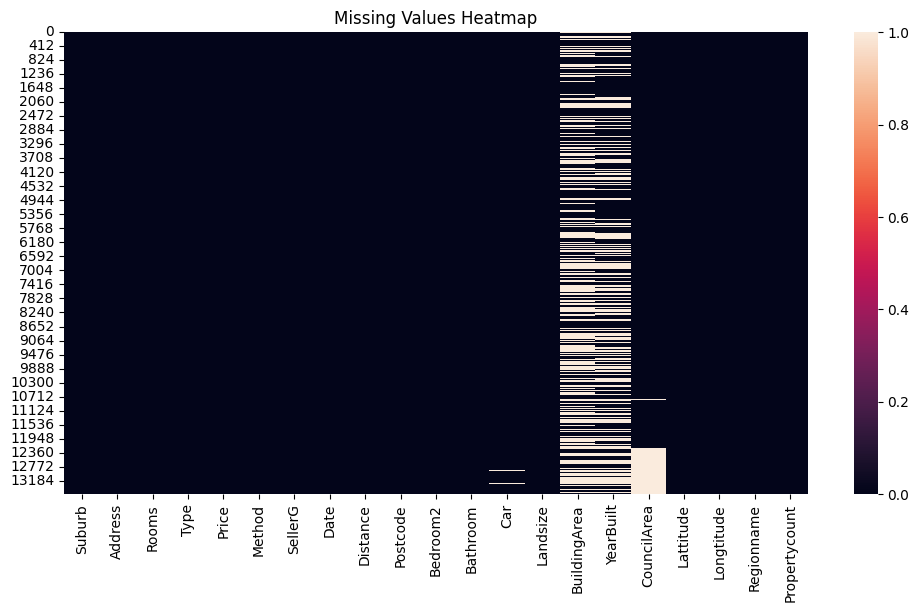

In [53]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.show()

In [54]:
df.dropna(subset=['Car'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [55]:
car_median = df['Car'].median()
df['Car'] = df['Car'].fillna(car_median)
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [56]:
df[df.isnull().sum(axis=1) > 2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7584,Brighton East,7 Roberts Ct,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,...,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,Southern Metropolitan,6938.0
10797,Reservoir,48 Crevelli St,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,...,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,Northern Metropolitan,21650.0
12215,Alphington,22 Harker St,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,...,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,Northern Metropolitan,2211.0
12217,Altona Meadows,96 Linden St,3,h,590000.0,PI,hockingstuart,3/09/2017,15.5,3028.0,...,1.0,2.0,459.0,NaN,NaN,NaN,-37.87063,144.77632,Western Metropolitan,7630.0
12220,Armadale,2/26 Mercer Rd,2,u,820000.0,S,Jellis,3/09/2017,6.3,3143.0,...,1.0,1.0,1501.0,NaN,NaN,NaN,-37.85280,145.02684,Southern Metropolitan,4836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,Vermont South,9 Winswood Cl,4,h,1250000.0,PI,Philip,26/08/2017,17.2,3133.0,...,2.0,2.0,986.0,NaN,NaN,NaN,-37.84679,145.20051,Eastern Metropolitan,4280.0
13567,Viewbank,149 Graham Rd,5,h,1316000.0,SP,Nelson,26/08/2017,8.9,3084.0,...,3.0,3.0,696.0,NaN,NaN,NaN,-37.73501,145.08341,Eastern Metropolitan,2698.0
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,551.0,NaN,NaN,NaN,-37.87608,145.22390,Eastern Metropolitan,7082.0
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,674.0,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0


In [57]:
df['BuildingArea'] = df['BuildingArea'].fillna(0)
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [58]:
# not needed cos done above with median
missing_car_mask = df['Car'].isnull()
df.loc[missing_car_mask, 'Car'] = np.random.randint(1, 5, size=missing_car_mask.sum())
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [59]:
imputer = KNNImputer(n_neighbors=5)
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

In [60]:
missing_summary = df.isnull().mean().reset_index()
missing_summary.columns = ['Column', 'MissingPercentage']
missing_summary['MissingPercentage'] *= 100
print(missing_summary)

           Column  MissingPercentage
0          Suburb           0.000000
1         Address           0.000000
2           Rooms           0.000000
3            Type           0.000000
4           Price           0.000000
5          Method           0.000000
6         SellerG           0.000000
7            Date           0.000000
8        Distance           0.000000
9        Postcode           0.000000
10       Bedroom2           0.000000
11       Bathroom           0.000000
12            Car           0.000000
13       Landsize           0.000000
14   BuildingArea           0.000000
15      YearBuilt           0.000000
16    CouncilArea          10.081001
17      Lattitude           0.000000
18     Longtitude           0.000000
19     Regionname           0.000000
20  Propertycount           0.000000


In [61]:
df.to_csv("cleaned_data.csv", index=False)

In [62]:
df1 = pd.read_csv('cleaned_data.csv')
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [63]:
df1.select_dtypes(include=['object']).columns.tolist()

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [64]:
le_type = LabelEncoder()
df1['Type'] = le_type.fit_transform(df1['Type'])

In [65]:
for col in ['Method', 'SellerG']:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype(str))

In [66]:
print(df1['Regionname'].nunique())
print(df1['Regionname'].unique())

8
['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


In [67]:
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
region_encoded = ohe.fit_transform(df1[['Regionname']])

region_feature_names = ohe.get_feature_names_out(['Regionname'])
region_encoded_df = pd.DataFrame(region_encoded, index=df1.index, columns=region_feature_names)

df1 = pd.concat([df1.drop('Regionname', axis=1), region_encoded_df], axis=1)


In [68]:
df1 = pd.get_dummies(df1, columns=df1.select_dtypes(include='object').columns)

In [69]:
print(df1.columns)

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car',
       ...
       'CouncilArea_Moreland', 'CouncilArea_Nillumbik',
       'CouncilArea_Port Phillip', 'CouncilArea_Stonnington',
       'CouncilArea_Unavailable', 'CouncilArea_Whitehorse',
       'CouncilArea_Whittlesea', 'CouncilArea_Wyndham', 'CouncilArea_Yarra',
       'CouncilArea_Yarra Ranges'],
      dtype='object', length=13807)


In [70]:
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
    df1['Year'] = df1['Date'].dt.year
    df1['Month'] = df1['Date'].dt.month
    df1.drop('Date', axis=1, inplace=True)
else:
    print("not found")

not found


In [71]:
type_map = {'h': 0, 'u': 1, 't': 2}

if df1['Type'].dtype == 'object':
    df1['Type'] = df1['Type'].map(type_map)

In [72]:
ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first'), ['Method', 'SellerG']),
    ],
    remainder='passthrough'
)
df1 = pd.DataFrame(ct.fit_transform(df1), columns=ct.get_feature_names_out())

In [73]:
if 'CouncilArea' in df1.columns:
    df1['CouncilArea'] = df1['CouncilArea'].astype('category')
    df1['CouncilArea'] = df1['CouncilArea'].cat.codes

In [74]:
if 'SellerG' in df1.columns:
    freq_map = df1['SellerG'].value_counts().to_dict()
    df1['SellerG_FE'] = df1['SellerG'].map(freq_map)

In [75]:
if 'SellerG' in df1.columns:
    seller_counts = df1['SellerG'].value_counts()
    rare_sellers = seller_counts[seller_counts < 10].index
    df1['SellerG_grouped'] = df1['SellerG'].replace(rare_sellers, 'Other')
    le = LabelEncoder()
    df1['SellerG_grouped'] = le.fit_transform(df1['SellerG_grouped'])

In [76]:
def label_encode_column(df1, col_name):
    le = LabelEncoder()
    df1[col_name] = le.fit_transform(df1[col_name].astype(str))
    return df1

In [77]:
if 'Suburb' in df1.columns and 'Price' in df1.columns:
    suburb_target_mean = df1.groupby('Suburb')['Price'].mean()
    df1['Suburb_TE'] = df1['Suburb'].map(suburb_target_mean)

In [78]:
df1.to_csv("encoded_data.csv", index=False)

In [79]:
df2 = pd.read_csv('cleaned_data.csv')

In [80]:
df2.select_dtypes(include=[np.number]).columns.tolist()

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [81]:
standard_scaler = StandardScaler()
scaled_standard = standard_scaler.fit_transform(df2[['Distance', 'Landsize', 'BuildingArea']])
df2[['Distance_scaled', 'Landsize_scaled', 'BuildingArea_scaled']] = scaled_standard

In [82]:
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(df2[['Price', 'Rooms']])
df2[['Price_scaled', 'Rooms_scaled']] = scaled_minmax

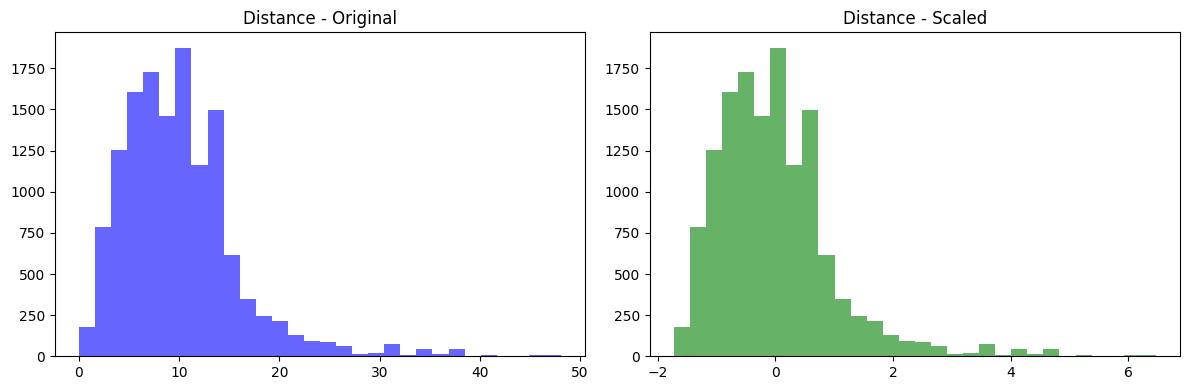

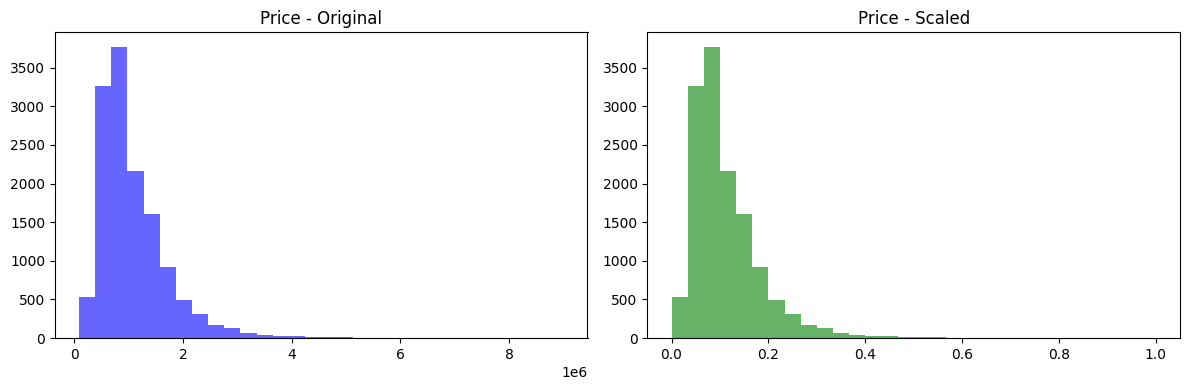

In [83]:
def plot_scaled_vs_unscaled(original, scaled, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(original, bins=30, color='blue', alpha=0.6)
    plt.title(f'{title} - Original')
    
    plt.subplot(1, 2, 2)
    plt.hist(scaled, bins=30, color='green', alpha=0.6)
    plt.title(f'{title} - Scaled')
    
    plt.tight_layout()
    plt.show()

plot_scaled_vs_unscaled(df2['Distance'], df2['Distance_scaled'], 'Distance')
plot_scaled_vs_unscaled(df2['Price'], df2['Price_scaled'], 'Price')

In [84]:
robust_scaler = RobustScaler()
scaled_robust = robust_scaler.fit_transform(df2[['Landsize']])
df2['Landsize_robust_scaled'] = scaled_robust

In [85]:
ct_scaler = ColumnTransformer(transformers=[
    ('standard', StandardScaler(), ['BuildingArea']),
    ('minmax', MinMaxScaler(), ['Rooms']),
    ('robust', RobustScaler(), ['Landsize'])
], remainder='passthrough')

scaled_values = ct_scaler.fit_transform(df2[['BuildingArea', 'Rooms', 'Landsize']])
scaled_df = pd.DataFrame(scaled_values, columns=['BuildingArea_std', 'Rooms_minmax', 'Landsize_robust'])
df2 = pd.concat([df2, scaled_df], axis=1)

In [86]:
df.to_csv("scaled_data.csv", index=False)

In [87]:
power_scaler = PowerTransformer(method='yeo-johnson')
skewed_features = ['Price', 'Landsize', 'BuildingArea']
power_scaled = power_scaler.fit_transform(df2[skewed_features])
df2[[f'{col}_power' for col in skewed_features]] = power_scaled

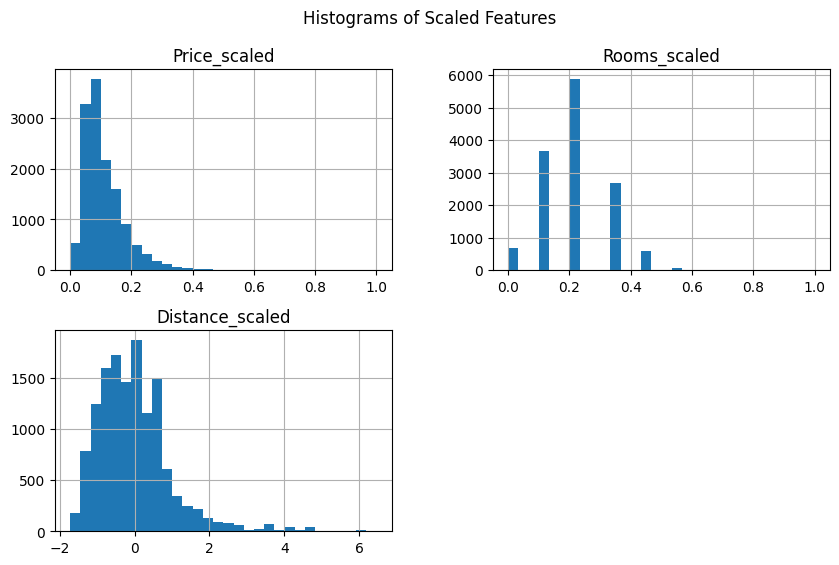

In [88]:
df2[['Price_scaled', 'Rooms_scaled', 'Distance_scaled']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Histograms of Scaled Features')
plt.show()

In [89]:
def apply_scaler(df, columns, scaler, suffix='_scaled'):
    scaler_instance = scaler()
    scaled_values = scaler_instance.fit_transform(df[columns])
    scaled_df = pd.DataFrame(scaled_values, columns=[col + suffix for col in columns], index=df.index)
    return pd.concat([df, scaled_df], axis=1)

df2 = apply_scaler(df2, ['Distance', 'Price'], StandardScaler, suffix='_std')

In [90]:
df2.isnull().sum()

Suburb                       0
Address                      0
Rooms                        0
Type                         0
Price                        0
Method                       0
SellerG                      0
Date                         0
Distance                     0
Postcode                     0
Bedroom2                     0
Bathroom                     0
Car                          0
Landsize                     0
BuildingArea                 0
YearBuilt                    0
CouncilArea               1369
Lattitude                    0
Longtitude                   0
Regionname                   0
Propertycount                0
Distance_scaled              0
Landsize_scaled              0
BuildingArea_scaled          0
Price_scaled                 0
Rooms_scaled                 0
Landsize_robust_scaled       0
BuildingArea_std             0
Rooms_minmax                 0
Landsize_robust              0
Price_power                  0
Landsize_power               0
Building

In [91]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [92]:
stratify_col = df2['Regionname'] if 'Regionname' in df2.columns else None

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=stratify_col,random_state=42)

In [93]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10864, 34)
X_test shape: (2716, 34)
y_train shape: (10864,)
y_test shape: (2716,)


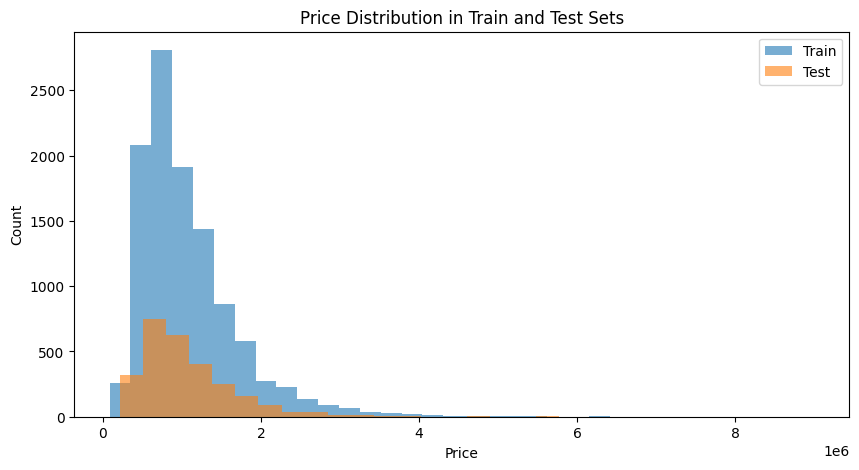

In [94]:
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=30, alpha=0.6, label='Train')
plt.hist(y_test, bins=30, alpha=0.6, label='Test')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution in Train and Test Sets")
plt.legend()
plt.show()

In [95]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', None)])

In [96]:
pipeline.steps[-1] = ('model', LinearRegression())

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Linear Regression R² score on test set:", round(r2, 4))

Linear Regression R² score on test set: 1.0


In [97]:
train_df = X_train.copy()
train_df['Price'] = y_train
test_df = X_test.copy()
test_df['Price'] = y_test

train_df.to_csv("train_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)

In [98]:
def split_and_preprocess(dataframe, target='Price', stratify_by=None, test_size=0.2, random_state=42):

    dataframe = dataframe.dropna(subset=[target])

    X = dataframe.drop(target, axis=1)
    y = dataframe[target]

    stratify = dataframe[stratify_by] if stratify_by and stratify_by in dataframe.columns else None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=stratify, random_state=random_state
    )

    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )

    return X_train, X_test, y_train, y_test, preprocessor